# Q1 Perform the regression analysis using Boston Housing dataset (50 points).

## Task 1: Data Exploration and Preprocessing (25 points).

#### Exploratory Data Analysis (EDA): Perform a comprehensive EDA on the Boston Housing dataset. Visualize the distribution of the target variable and important features using histograms, box plots, and scatter plots.

#### Feature Scaling: Discuss the importance of feature scaling in regression analysis.

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [305]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [306]:
print(sklearn.__version__)

0.24.2


In [307]:
boston_data = load_boston()
# housing_dataset.sample(20)
housing_dataset = pd.DataFrame(boston_data.data, columns= boston_data.feature_names)
housing_dataset["MEDV"] = boston_data.target
# type(boston_data)
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [308]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [309]:
housing_dataset = pd.DataFrame(boston_data.data, columns= boston_data.feature_names)
housing_dataset["MEDV"] = boston_data.target
# housing_dataset = pd.read_csv("HousingData.csv")
housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [310]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [311]:
housing_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [312]:
housing_dataset.duplicated().value_counts()

False    506
dtype: int64

In [313]:
housing_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [314]:
housing_dataset[housing_dataset.isnull().any(axis=1)].shape

(0, 14)

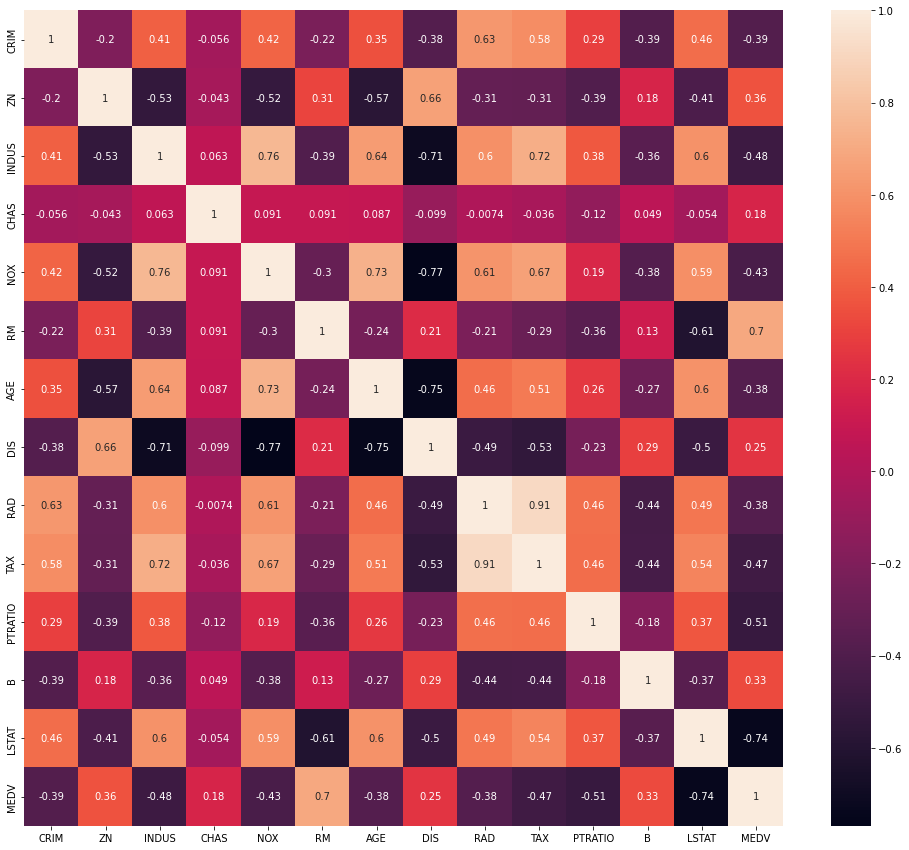

In [315]:
correlation_matrix = housing_dataset.corr(method="pearson")

fig, axs = plt.subplots(figsize = (17, 15))
sns.heatmap(correlation_matrix, annot= True)
plt.savefig('correlation_matrix_boston_dataset.png', dpi=300, bbox_inches='tight')  # Save as PNG with 300 dpi
plt.show()

In [316]:
# print(correlation_matrix)
significent_correlation_matrix_with_target = correlation_matrix[abs(correlation_matrix["MEDV"])> 0.4].loc[:, ["MEDV"]]
significent_correlation_matrix_with_target

,MEDV
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
MEDV,1.000000


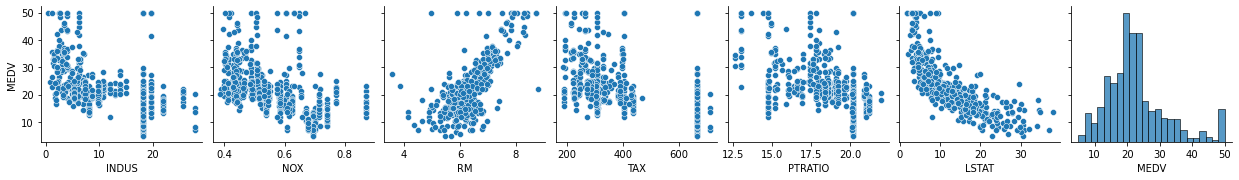

In [317]:
sns.pairplot(data= housing_dataset, x_vars= significent_correlation_matrix_with_target.index, y_vars= "MEDV")
# plt.title("pair plot between intermediate to highly correlated independent features and target variable", fontsize = 15, pos)
plt.savefig('pair plot between intermediate to highly correlated independent features and target variable', dpi=300, bbox_inches='tight')  # Save as PNG with 300 dpi
plt.show()

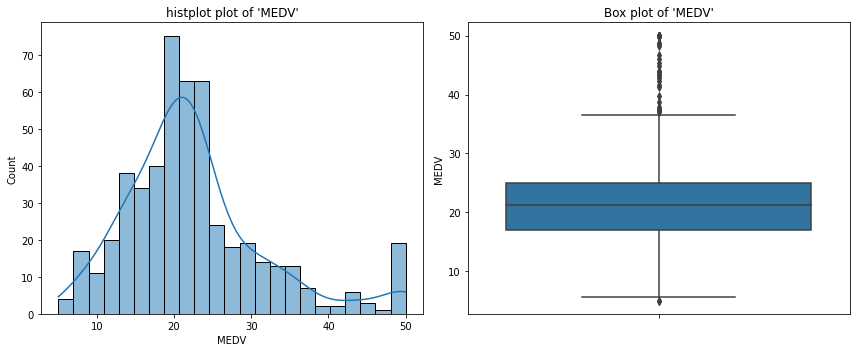

In [318]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].set_title(f"histplot plot of 'MEDV'")
sns.histplot(data= housing_dataset, x= "MEDV", kde="True", ax= axs[0])

axs[1].set_title(f"Box plot of 'MEDV'")
sns.boxplot(data= housing_dataset, y= "MEDV", ax = axs[1])

plt.tight_layout()
plt.savefig('Histogram plot and box plot of target variable MEDV', dpi=300, bbox_inches='tight')  # Save as PNG with 300 dpi
plt.show()

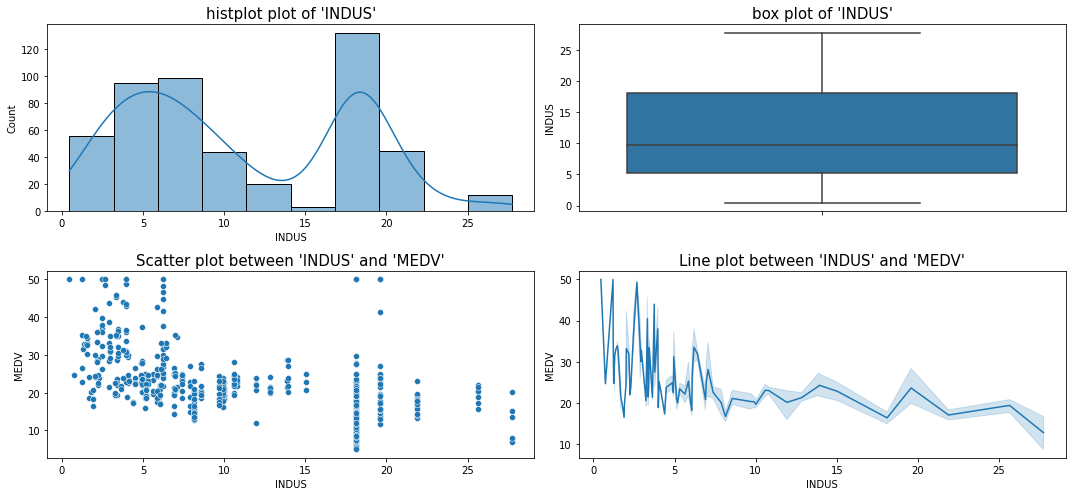

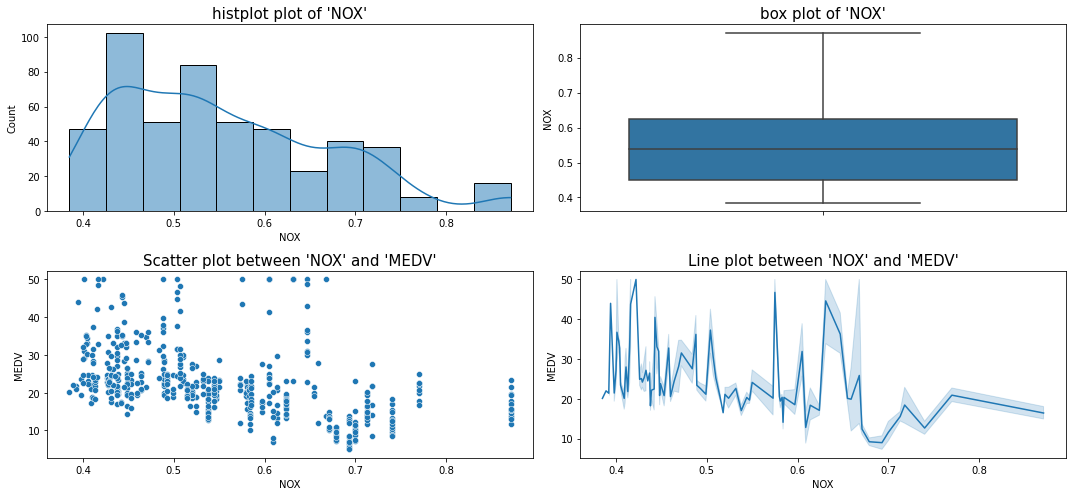

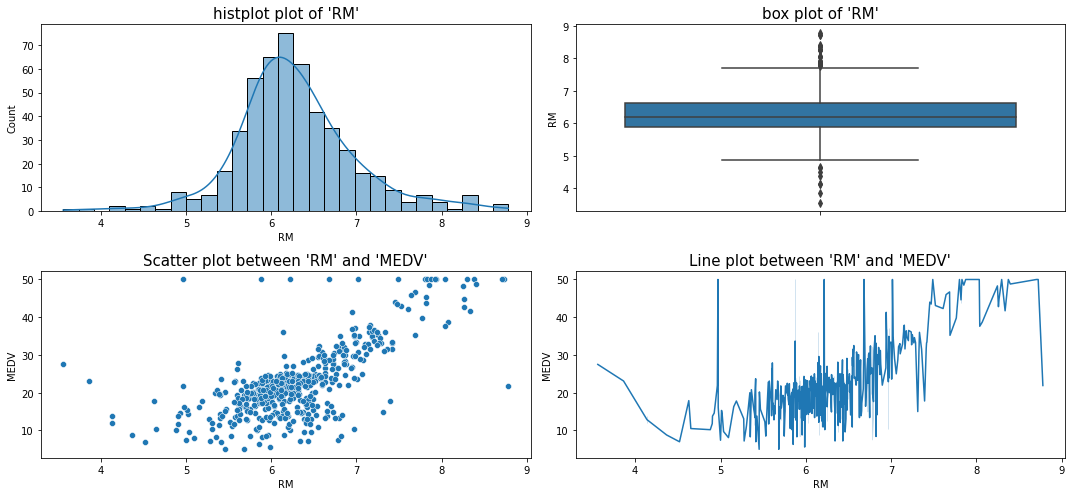

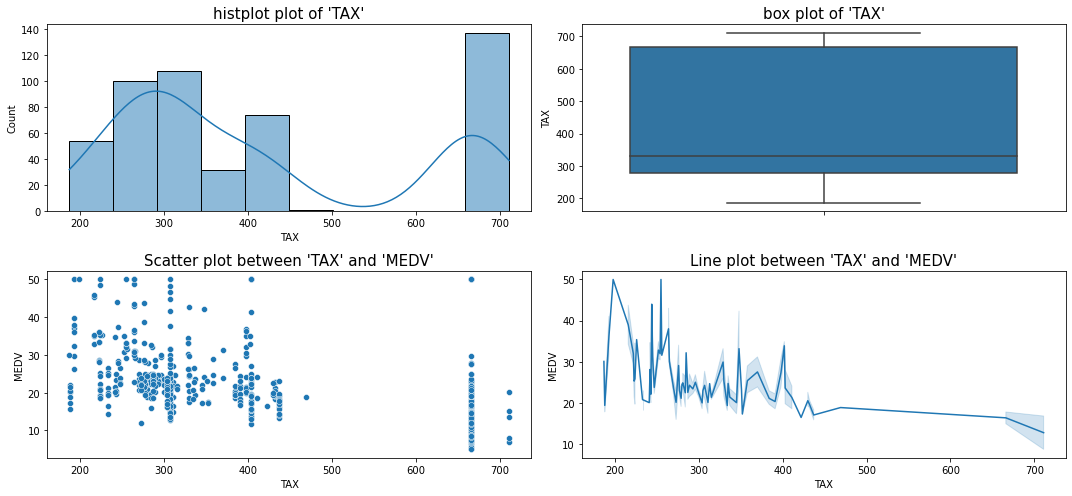

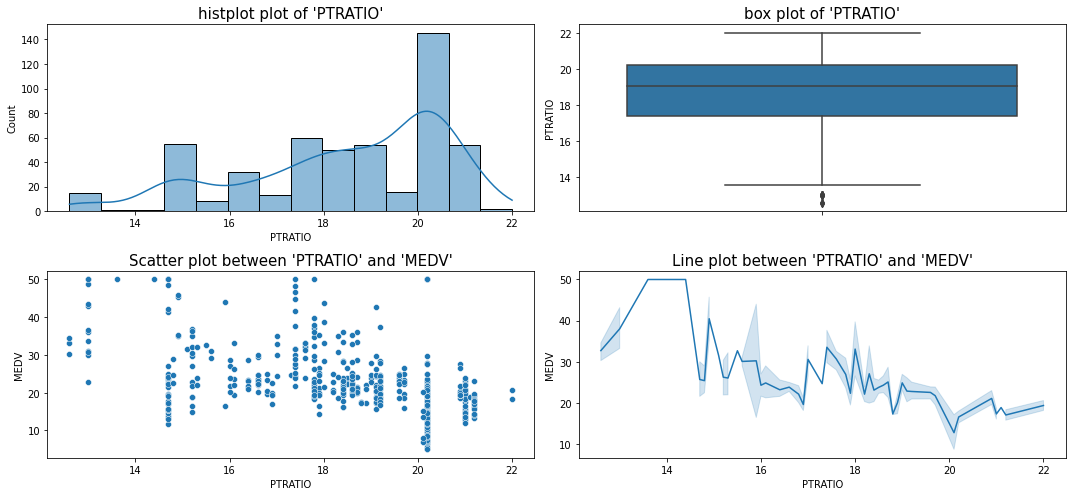

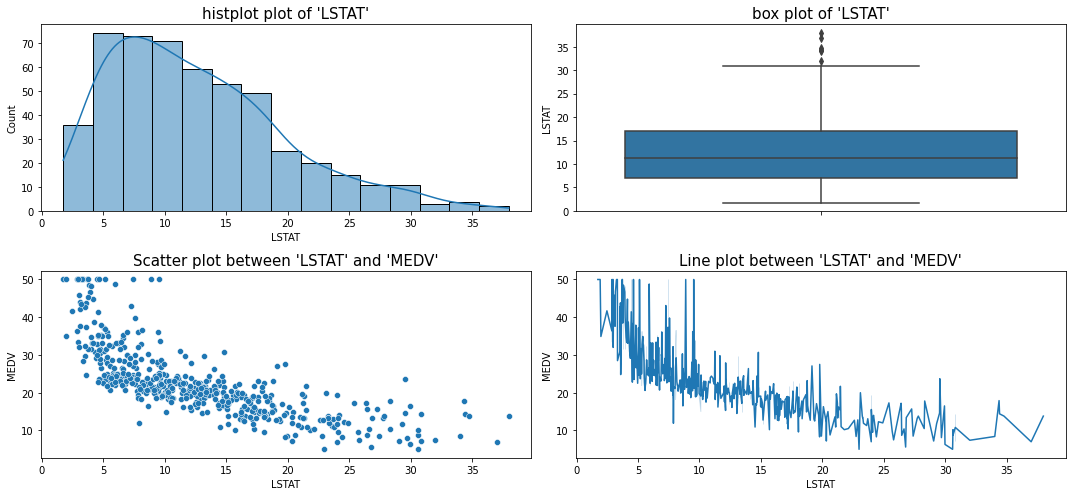

In [319]:
for column in significent_correlation_matrix_with_target.index:
    if(column != "MEDV"):
        fig, axs = plt.subplots(2, 2, figsize = (15, 7))
        
        sns.histplot(data= housing_dataset, x= column, kde=True, ax = axs[0, 0])
        axs[0, 0].set_title(f"histplot plot of '{column}'", fontsize = 15)
        
        sns.boxplot(data= housing_dataset, y= column, ax = axs[0, 1])
        axs[0, 1].set_title(f"box plot of '{column}'", fontsize = 15)
        
        sns.scatterplot(data= housing_dataset, x= column, y= "MEDV" , ax = axs[1, 0])
        axs[1, 0].set_title(f"Scatter plot between '{column}' and 'MEDV'", fontsize = 15)
        
        sns.lineplot(data= housing_dataset, x= column, y= "MEDV" , ax = axs[1, 1])
        axs[1, 1].set_title(f"Line plot between '{column}' and 'MEDV'", fontsize = 15)
        
        plt.tight_layout()
        plt.savefig(f'Histogram and box plot, line plot and scatter plot of independent feature {column}', dpi=300, bbox_inches='tight')  # Save as PNG with 300 dpi
        plt.show()

In [320]:
def FindOutlierRecordsBasedOnColumn(dataFrame: pd.DataFrame, columnToCalculateOutlier: str, multiplier: float = 1.5):
    if(not pd.api.types.is_numeric_dtype(dataFrame[columnToCalculateOutlier])):
        raise ValueError("Column must contains numeric values only.")
    quartile1 = dataFrame[columnToCalculateOutlier].quantile(0.25)
    quartile3 = dataFrame[columnToCalculateOutlier].quantile(0.75)
    interQuartileRange = quartile3 - quartile1
    lowerLimit = quartile1 - multiplier * interQuartileRange
    upperLimit = quartile3 +multiplier *interQuartileRange
    return dataFrame[(dataFrame[columnToCalculateOutlier] <= lowerLimit) | (dataFrame[columnToCalculateOutlier] >= upperLimit)].index
    
    
def dropOutlierBasedOnColumn(dataFrame: pd.DataFrame, columnToCalculateOutlier):
    return dataFrame.loc[dataFrame.index.difference(FindOutlierRecordsBasedOnColumn(dataFrame, columnToCalculateOutlier))]


In [321]:
housing_dataset_without_outlier = housing_dataset
for columnName in significent_correlation_matrix_with_target.index:
    # print(f"outlier in {columnName}: {FindOutlierRecordsBasedOnColumn(housing_dataset, columnName).shape}")
    housing_dataset_without_outlier = dropOutlierBasedOnColumn(housing_dataset_without_outlier, columnName)
    
housing_dataset_without_outlier.shape

(439, 14)

### Feature Scaling: Discuss the importance of feature scaling in regression analysis.

Feature Scaling is the data pre-processing technique to normalize or standardize the data of independent variables / features. This technique makes sure that all data from independent variables are in similar scale. There are mainly two techniques for the feature scaling. They are as follow:
- Mean Normalization
- Z-core Normalization.

Feature scaling is important while performing machine learning techniques in the the data set. Without scaling, features with wide range of data have potential to influence the machine learning algorithm, leading to skewed results or slower convergence in algorithms that rely on gradient-based optimization. Consider we have a dataset having 2 independent features and one feature has the data range of 2 digit data and another feature has data ranging in the scale of 100000. When gradient based machine learning algorithms are applied in that kind of data set then feature with large magnitude of data may impact the performance of algorithm by overshooting while optimizing the coefficients. <br>
Following are the benefits of feature scaling:
- Feature scaling helps gradient descent to converge faster.
- Feature scaling ensures that there will not be any biasness in the features based on their scale of data. 

# Task 2: Regression Analysis (25 points). <br>
- Model Implementation: Using the provided code as a base, implement linear, ridge, lasso, and
OLS regression models.
- Model Evaluation: Evaluate each model's performance using the R^2 score and Mean
Squared Error (MSE). Discuss the implications of these metrics in the context of model
selection.
- Report results for simple and multiple linear regression.

In [322]:
#Simple Linear Regression between independent feature and target variable having maximum correlation
target_correlation = correlation_matrix['MEDV']

target_correlation = target_correlation.drop(labels=['MEDV'])

max_correlation_index = target_correlation.abs().idxmax()
max_correlation_value = target_correlation[max_correlation_index]
print(f"{max_correlation_index}: {max_correlation_value}")

X_train_univariate, X_test_univariate, y_train_univariate, y_test_univariate = train_test_split(
    housing_dataset[["LSTAT"]], 
    housing_dataset[["MEDV"]], 
    test_size=0.2, 
    random_state=42
    )

univariate_linear_model = LinearRegression().fit(X_train_univariate, y_train_univariate)
y_test_univariate_predicted = univariate_linear_model.predict(X_test_univariate)

housing_dataset_univariate_without_outlier = housing_dataset[["LSTAT", "MEDV"]]
for columnName in housing_dataset_univariate_without_outlier.columns:
    housing_dataset_univariate_without_outlier = dropOutlierBasedOnColumn(housing_dataset_univariate_without_outlier, columnName)

X_train_univariate_without_outlier, X_test_univariate_without_outlier, y_train_univariate_without_outlier, y_test_univariate_without_outlier = train_test_split(
    housing_dataset_without_outlier[["LSTAT"]], 
    housing_dataset_without_outlier[["MEDV"]], 
    test_size=0.2, 
    random_state=42)

univariate_linear_model_without_outlier = LinearRegression().fit(X_train_univariate_without_outlier, y_train_univariate_without_outlier)
y_train_univariate_predicted_without_outlier = univariate_linear_model.predict(X_test_univariate_without_outlier)

#Univariate Standardization
univariate_scaler = StandardScaler()
X_train_univariate_standardized = univariate_scaler.fit_transform(X_train_univariate)
X_test_univariate_standardized = univariate_scaler.transform(X_test_univariate)

standardized_univariate_linear_model = LinearRegression().fit(X_train_univariate_standardized, y_train_univariate)
y_test_univariate_standardized_predicted = standardized_univariate_linear_model.predict(X_test_univariate_standardized)

#Univariate Standardization without outlier
univariate_scaler_without_outlier = StandardScaler()
X_train_univariate_standardized_without_outlier = univariate_scaler_without_outlier.fit_transform(X_train_univariate_without_outlier)
X_test_univariate_standardized_without_outlier = univariate_scaler_without_outlier.transform(X_test_univariate_without_outlier)

standardized_univariate_linear_model_without_outlier = LinearRegression().fit(X_train_univariate_standardized_without_outlier, y_train_univariate_without_outlier)
y_test_univariate_standardized_predicted_without_outlier = standardized_univariate_linear_model.predict(X_test_univariate_standardized_without_outlier)



LSTAT: -0.7376627261740143


In [323]:


X_train, X_test, y_train, y_test = train_test_split(housing_dataset.drop(columns= ["MEDV"]), housing_dataset[["MEDV"]], test_size=0.2, random_state=42)

# Using LinearRegression model from sklearn
linear_model = LinearRegression().fit(X_train, y_train)
y_test_predicted_linear_model = linear_model.predict(X_test)

#using ridge model from sklearn
ridge_linear_model = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
y_test_predicted_ridge = ridge_linear_model.predict(X_test)

#using Lasso model from sklearn
lasso_linear_model = LassoCV(
    alphas=[0.001, 0.01, 0.1, 1.0, 10.0]
    ).fit(X_train, y_train.values.ravel())
y_test_predicted_lasso = lasso_linear_model.predict(X_test)


X_train_with_const = sm.add_constant(X_train)
ols_linear_model = sm.OLS(y_train, X_train_with_const).fit()
X_test_with_const = sm.add_constant(X_test)
y_test_predicted_ols = ols_linear_model.predict(X_test_with_const)

In [324]:
#For dataset after the removal of outliers.

X_train_without_outlier, X_test_without_outlier, y_train_without_outlier, y_test_without_outlier = train_test_split(housing_dataset_without_outlier.drop(columns= ["MEDV"]), housing_dataset_without_outlier[["MEDV"]], test_size=0.2, random_state=42)

# Using LinearRegression model from sklearn
linear_model_without_outlier = LinearRegression().fit(X_train_without_outlier, y_train_without_outlier)
y_test_predicted_linear_model_without_outlier = linear_model_without_outlier.predict(X_test_without_outlier)

#using ridge model from sklearn
ridge_linear_model_without_outlier = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_without_outlier, y_train_without_outlier)
y_test_predicted_ridge_without_outlier = ridge_linear_model_without_outlier.predict(X_test_without_outlier)

#using Lasso model from sklearn
lasso_linear_model_without_outlier = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_without_outlier, y_train_without_outlier.values.ravel())
y_test_predicted_lasso_without_outlier = lasso_linear_model_without_outlier.predict(X_test_without_outlier)


X_train_with_const_without_outlier = sm.add_constant(X_train_without_outlier)
ols_linear_model_without_outlier = sm.OLS(y_train_without_outlier, X_train_with_const_without_outlier).fit()
X_test_with_const_without_outlier = sm.add_constant(X_test_without_outlier)
y_test_predicted_ols_without_outlier = ols_linear_model_without_outlier.predict(X_test_with_const_without_outlier)


In [325]:
#Standardization of the feature data 

scaler = StandardScaler()

# scaler.fit(housing_dataset)
X_standardized_train = scaler.fit_transform(X_train)
X_standardized_test = scaler.transform(X_test)

In [326]:
# Using LinearRegression model from sklearn in scaled feature data
linear_model_with_scaled_data = LinearRegression().fit(X_standardized_train, y_train)
y_standardized_test_predicted_linear_model = linear_model_with_scaled_data.predict(X_standardized_test)

#using ridge model from sklearn
ridge_linear_model_with_scaled_data = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_standardized_train, y_train)
y_standardized_test_predicted_ridge = ridge_linear_model_with_scaled_data.predict(X_standardized_test)

#using Lasso model from sklearn
lasso_linear_model_with_scaled_data = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_standardized_train, y_train.values.ravel())
y_standardized_test_predicted_lasso = lasso_linear_model_with_scaled_data.predict(X_standardized_test)

X_standardized_train_with_const = sm.add_constant(X_standardized_train)
ols_linear_model_with_scaled_data = sm.OLS(y_train, X_standardized_train_with_const).fit()
X_standardized_test_with_const = sm.add_constant(X_standardized_test)
y_standardized_test_predicted_ols = ols_linear_model_with_scaled_data.predict(X_standardized_test_with_const)


In [327]:
#Standardization on clean data set
scaler_without_outlier = StandardScaler()

# scaler.fit(housing_dataset)
X_standardized_train_without_outlier = scaler_without_outlier.fit_transform(X_train_without_outlier)
X_standardized_test_without_outlier = scaler_without_outlier.transform(X_test_without_outlier)

In [328]:
# Using LinearRegression model from sklearn in clean scaled feature data
linear_model_with_clean_scaled_data = LinearRegression().fit(X_standardized_train_without_outlier, y_train_without_outlier)
y_clean_standardized_test_predicted_linear_model = linear_model_with_clean_scaled_data.predict(X_standardized_test_without_outlier)

#using ridge model from sklearn
ridge_linear_model_with_clean_scaled_data = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_standardized_train_without_outlier, y_train_without_outlier)
y_clean_standardized_test_predicted_ridge = ridge_linear_model_with_clean_scaled_data.predict(X_standardized_test_without_outlier)

#using Lasso model from sklearn
lasso_linear_model_with_clean_scaled_data = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_standardized_train_without_outlier, y_train_without_outlier.values.ravel())
y_clean_standardized_test_predicted_lasso = lasso_linear_model_with_clean_scaled_data.predict(X_standardized_test_without_outlier)

X_clean_standardized_train_with_const = sm.add_constant(X_standardized_train_without_outlier)
ols_linear_model_with_clean_scaled_data = sm.OLS(y_train_without_outlier, X_clean_standardized_train_with_const).fit()
X_clean_standardized_test_with_const = sm.add_constant(X_standardized_test_without_outlier)
y_clean_standardized_test_predicted_ols = ols_linear_model_with_clean_scaled_data.predict(X_clean_standardized_test_with_const)


In [329]:

print(f"Univariate/Simple Linear Regression between {max_correlation_index} and MEDV \n")
dataset_types = ['Original dataset', 'standardized_dataset']
univariate_predictions = [y_test_univariate_predicted, y_test_univariate_standardized_predicted]
for dataset_type, y_pred in zip(dataset_types, univariate_predictions):
    print(f"Univariate Regression R^2 score for {dataset_type}: {r2_score(y_test_univariate, y_pred):.4f}")
    print(f"Univariate Regression MSE for {dataset_type}: {mean_squared_error(y_test_univariate, y_pred):.4f}\n")

dataset_types_without_outlier = ['original_dataset_without_outlier','standardized_dataset_without_outlier']
univariate_predictions_without_outlier = [y_test_univariate_without_outlier, y_test_univariate_standardized_predicted_without_outlier]
for dataset_type_without_outlier, y_pred in zip(dataset_types_without_outlier, univariate_predictions_without_outlier):
    print(f"Univariate Regression R^2 score for {dataset_type_without_outlier}: {r2_score(y_test_univariate_without_outlier, y_pred):.4f}")
    print(f"Univariate Regression MSE for {dataset_type_without_outlier}: {mean_squared_error(y_test_univariate_without_outlier, y_pred):.4f}\n")


print("Mean Squared Error and R^2 score analysis for different models where input data are fed to the system as it is.\n")
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_test_predicted_ols, y_test_predicted_linear_model, y_test_predicted_ridge, y_test_predicted_lasso]
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}\n")


print("Mean Squared Error and R^2 score analysis for different models where cleaned input data are fed to the system as it is.\n")
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions_without_outlier = [y_test_predicted_ols_without_outlier, y_test_predicted_linear_model_without_outlier, y_test_predicted_ridge_without_outlier, y_test_predicted_lasso_without_outlier]
for name, y_pred in zip(models, predictions_without_outlier):
    print(f"{name} Regression R^2 score for clean dataset: {r2_score(y_test_without_outlier, y_pred):.4f}")
    print(f"{name} Regression MSE for clean dataset: {mean_squared_error(y_test_without_outlier, y_pred):.4f}\n")
       
    
print("Mean Squared Error and R^2 score analysis for different models where input data are fed to the system after feature scaling.\n")
predections_standardized = [y_standardized_test_predicted_ols, y_standardized_test_predicted_linear_model, y_standardized_test_predicted_ridge, y_standardized_test_predicted_lasso]
for name, y_standardized_prediction in zip(models, predections_standardized):
    print(f"{name} Regression R^2 score for standardized output: {r2_score(y_test, y_standardized_prediction):.4f}")
    print(f"{name} Regression MSE for standardized output: {mean_squared_error(y_test, y_standardized_prediction):.4f}\n")
    

print("Mean Squared Error and R^2 score analysis for different models where clean input data are fed to the system after feature scaling.\n")
predections_on_clean_standardized = [y_clean_standardized_test_predicted_ols, y_clean_standardized_test_predicted_linear_model, y_clean_standardized_test_predicted_ridge, y_clean_standardized_test_predicted_lasso]
for name, y_clean_standardized_prediction in zip(models, predections_on_clean_standardized):
    print(f"{name} Regression R^2 score for standardized output: {r2_score(y_test_without_outlier, y_clean_standardized_prediction):.4f}")
    print(f"{name} Regression MSE for standardized output: {mean_squared_error(y_test_without_outlier, y_clean_standardized_prediction):.4f}\n")


Univariate/Simple Linear Regression between LSTAT and MEDV 

Univariate Regression R^2 score for Original dataset: 0.5429
Univariate Regression MSE for Original dataset: 33.5195

Univariate Regression R^2 score for standardized_dataset: 0.5429
Univariate Regression MSE for standardized_dataset: 33.5195

Univariate Regression R^2 score for original_dataset_without_outlier: 1.0000
Univariate Regression MSE for original_dataset_without_outlier: 0.0000

Univariate Regression R^2 score for standardized_dataset_without_outlier: 0.2464
Univariate Regression MSE for standardized_dataset_without_outlier: 23.0130

Mean Squared Error and R^2 score analysis for different models where input data are fed to the system as it is.

OLS Regression R^2 score: 0.6688
OLS Regression MSE: 24.2911

Linear Regression R^2 score: 0.6688
Linear Regression MSE: 24.2911

Ridge Regression R^2 score: 0.6686
Ridge Regression MSE: 24.3010

Lasso Regression R^2 score: 0.6688
Lasso Regression MSE: 24.2888

Mean Squared 

R^2 score and Mean Squared Error (MSE) are the evaluation matrics that are used to evaluate the performance of the machine learning algorithms/models. These matrics are mainly used in continuous regression models.

#### Mean Squared Error (MSE):
MSE is the average of the squared difference between predicted outputs and actual outputs. The equation is $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$.
<br>
<br>
MSE measures how far the predicted output is from the actual output. If MSE is lower/ tends to 0 then it indicates that predicted values are more closer to the actual output values. Lower value of MSE indicates that machine learning model is performing better and vice versa. 
<br>
In our analysis as shown in above output cell,
- For models without feature scaling: 
<br>
Lasso regression model has lowest value of the mean square error which is 24.2888 among given models. It means Lasso model is able to predict the output values which are more closer to the actual output values compared to other given models and ridge regression model has the highest value of 24.4958 among given regression models and it means outputs predicted by Ridge model are far from actual output when comparing with the output from other models.

- In case of models with standardized input datas:
<br>
OLS model and LinearRegression model have the lowest mean square error which is 24.2911. 

### R Squared ($R^2$):
R-Squared is the statistical measure that measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It tells how well the regression model is doing at explaining the relationship between the independent and dependent variables. R-Squared ranges from 0 to 1. If the value of R-Squared is closer to 1 then it indicates that model is performing well in predicting the output based on input variables.
<br>

In our analysis of the different models as shown in above output cell:
- For models without feature scaling: 
<br>
OLS model, Linear Regression model and Lasso model have highest value of R-squared and the value is 0.6688. These models are doing good job on predicting the output based on inputs and Ridge model has the low R-squared value and the value is 0.6686. 

- For models with feature scaling:
<br>
OLS model and Linear Regression model are performing well. They have same value of R-squared and the value is 0.6688.


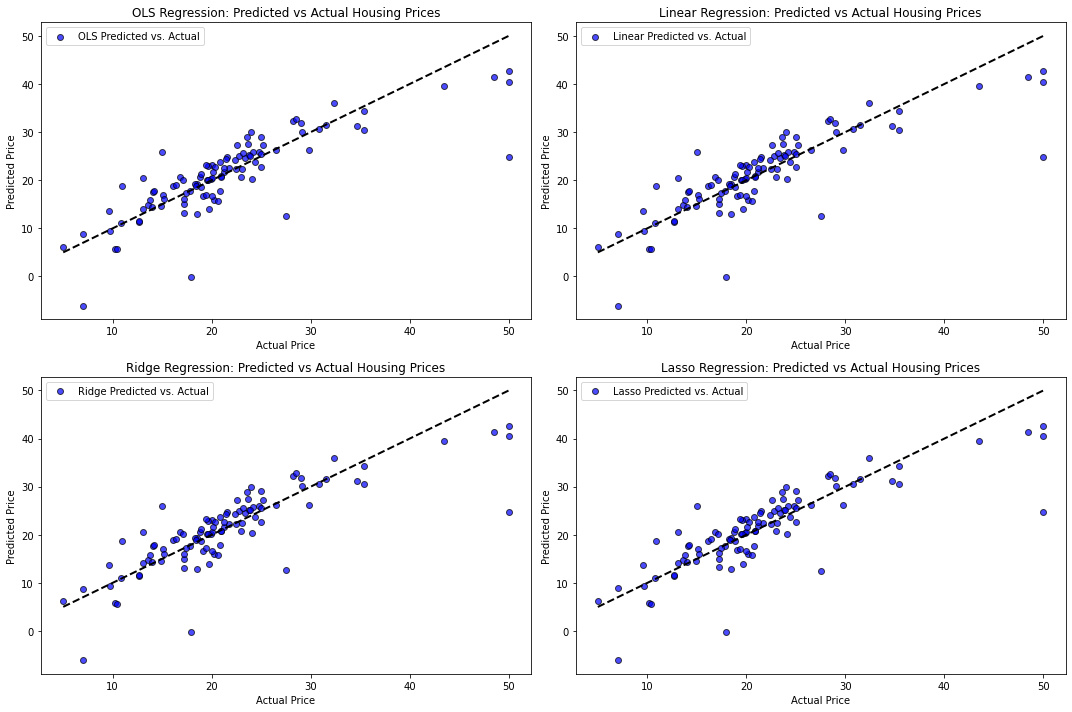

In [330]:
# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


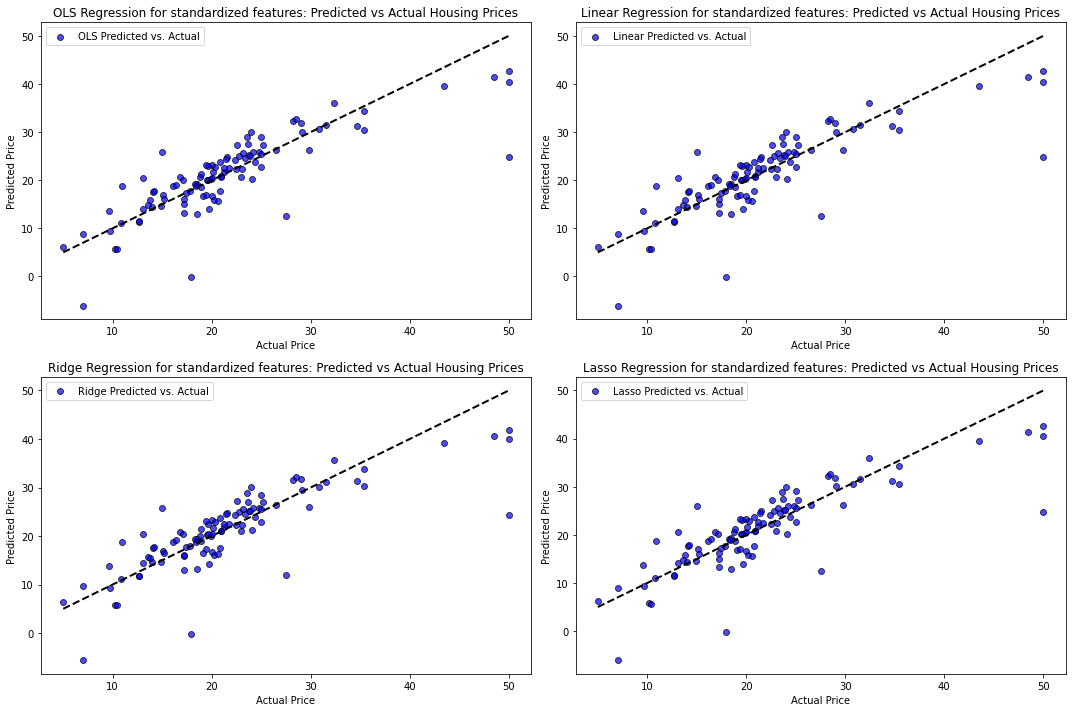

In [331]:
# Plotting Actual vs Predicted prices for all models after feature scaling
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_standardized_pred) in enumerate(zip(models, predections_standardized)):
    axs[i].scatter(y_test, y_standardized_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression for standardized features: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()
